<a href="https://colab.research.google.com/github/bhanubhakta/VectorDBTutorials/blob/main/VectorEmbedding/TextEmbedding/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


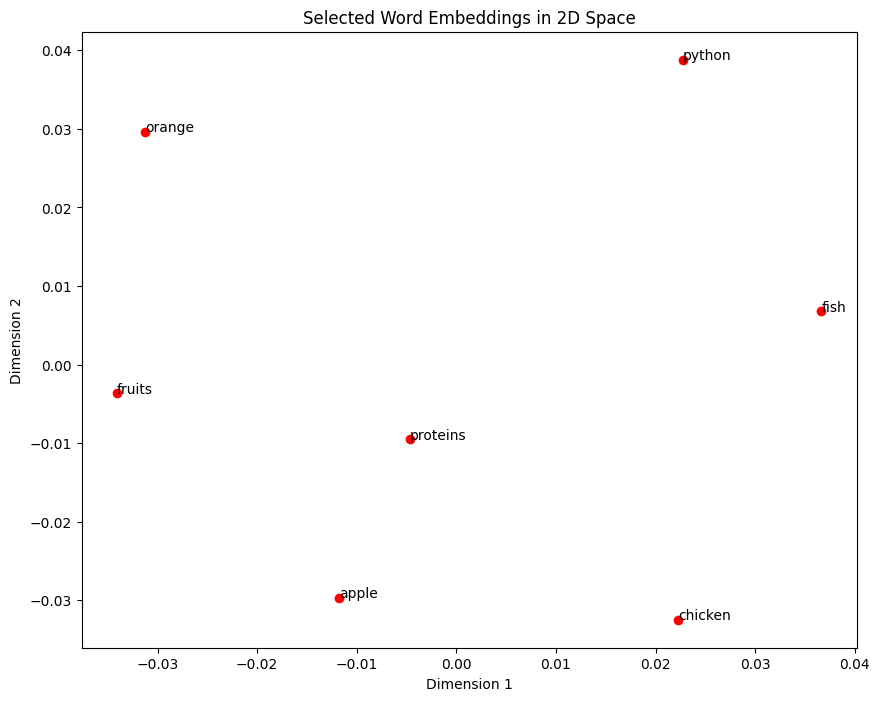

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Define a sample corpus
corpus = [
    "Apple and orange are fruits",
    "Paris and London are capitals",
    "Fish and chicken are proteins",
    "Beer and wine are beverages",
    "Python and Java are programming languages"
]

# Tokenize the corpus
tokenized_corpus = [word_tokenize(text.lower()) for text in corpus]

# Train a Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=2, min_count=1, sg=1)

# Define the target words for plotting
target_words = ['apple', 'orange', 'fish', 'chicken', 'proteins', 'fruits', 'python']

# Filter the vectors for target words only
target_vectors = [model.wv[word] for word in target_words if word in model.wv.index_to_key]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
target_vectors_2d = pca.fit_transform(target_vectors)

# Plotting the words in 2D space
plt.figure(figsize=(10,8))
for word, vec in zip(target_words, target_vectors_2d):
    if word in model.wv.index_to_key:  # Check if the word is in the model's vocabulary
        plt.annotate(word, (vec[0], vec[1]))
plt.scatter(target_vectors_2d[:, 0], target_vectors_2d[:, 1], marker='o', color='red')

# Set graph title and labels
plt.title('Selected Word Embeddings in 2D Space')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show the plot
plt.show()
